<h1 align="center">ENGC63 - 3º Projeto</h1>

**Universidade Federal da Bahia - UFBA**

**Disciplina :** Processamento Digital de Sinais

**Discentes :** Miguel Feliciano Mota Alves e Rodrigo Freitas Sá Barretto

## Introdução

A janela de kaiser é definida por:

$$
w[n] = 
\begin{cases}
\displaystyle
\frac{I_0[\beta(1-[\frac{(n-\alpha)}{\alpha}]^2)^{1/2}]}{I_0(\beta)}\\
0, & \text{caso contrário}
\end{cases}
$$

onde $\alpha = M/2$ e $I_0(\cdot)$ é a função de Besel modificada.

Para implementar o filtro FIR utilizando a **janela de Kaiser**, diferentemente dos outros tipos de janela, primeiro define-se as especificações do filtro desejado e, com as especificações definidas, calcula-se os parâmetros da janela $\beta$ e $M$ da janela.


## Dados do Projeto

A seguir estão as especificações definidas para o projeto do filtro digital.

### 1. Especificações de Frequência

Com uma frequência de corte central ($\omega_c$) e uma largura de banda de transição ($\Delta\omega$) definidas, podemos derivar as bordas da banda de passagem ($\omega_p$) e da banda de rejeição ($\omega_s$).

* **Frequência de Corte Central ($\omega_c$):**
    $$\omega_c = \frac{\pi}{2} \text{ rad/amostra}$$

* **Largura da Banda de Transição ($\Delta\omega$):**
    $$\Delta\omega = 0.1\pi \text{ rad/amostra}$$

* **Banda de Passagem:** O filtro deve passar frequências no intervalo de 0 até a borda da banda de passagem, $\omega_p = \omega_c - (\Delta\omega/2)$.
    $$0 \le \omega \le 0.45\pi \text{ rad/amostra}$$

* **Banda de Rejeição:** O filtro deve rejeitar frequências a partir da borda da banda de rejeição, $\omega_s = \omega_c + (\Delta\omega/2)$, até a frequência de Nyquist ($\pi$).
    $$0.55\pi \le \omega \le \pi \text{ rad/amostra}$$

### 2. Ripple e Atenuação

Como, para o projeto por janela, o filtro resultante terá o mesmo erro de pico na banda de passagem e na banda de rejeição, isto é, $\delta_p = \delta_s$ e a atenuação na banda de rejeição pode ser definida por:

$$A_s = -20 \log_{10}(|H(e^{j\omega})|) \ge 50 \text{ dB}$$

portanto:

$$\delta_p = \delta_s \approx 0.00316$$

### 3. Intervalos de Tolerância

Com base nas especificações de frequência e nos valores de ripple definidos, os intervalos de tolerância para a magnitude da resposta em frequência, $|H(e^{j\omega})|$, são os seguintes:

* **Na Banda de Passagem ($0 \le \omega \le 0.45\pi$):** O ganho deve estar dentro do seguinte intervalo: 
    $$0.99684 \le |H(e^{j\omega})| \le 1.00316$$

* **Na Banda de Rejeição ($0.55\pi \le \omega \le \pi$):** O ganho deve ser suprimido para o seguinte intervalo:
    $$ 0 \le |H(e^{j\omega})| \le 0.00316$$

In [120]:
from scipy.signal import kaiserord, firwin, freqz, tf2sos, sosfreqz
from numpy import pi, log10, abs, arange
import matplotlib.pyplot as plt

In [121]:
w_cutoff = pi / 2                  # Frequência de corte [rad/amostra]
w_transition = 0.1 * pi            # Região de transição [rad/amostra]
A = 50                                # Atenuação [dB]
w_pass = w_cutoff - w_transition/2    # Banda de passagem [rad/amostra]
w_stop = w_cutoff + w_transition/2    # Banda de rejeição [rad/amostra]
erro = 0.00316                        # Erro máximo

print(f"Frequência de corte: {w_cutoff/pi}π")
print(f"Região de transição: {w_transition/pi}π")
print(f"Banda de passagem: {w_pass/pi}π")
print(f"Banda de rejeição: {w_stop/pi}π")
print(f"Atenuação: {A} dB")
print(f"Erro máximo: {erro}")

Frequência de corte: 0.5π
Região de transição: 0.1π
Banda de passagem: 0.45π
Banda de rejeição: 0.55π
Atenuação: 50 dB
Erro máximo: 0.00316


In [ ]:
M, beta = kaiserord(A, w_transition / pi) # Calcula a ordem e o beta da janela kaiser
print(f"Ordem do filtro: {M}")
print(f"β = {beta}")

Ordem do filtro: 60
β = 4.533514120981248


Para este projeto, a ordem escolhida do filtro será PAR, para que o filtro projetado seja de tipo 1 e não imponha restrições. Isso é essencial para uma etapa futura do trabalho, onde serão feitas transformações do filtro passa-baixas para outros tipos de filtro (e.g. passa-altas). Se outros tipos de filtro fossem utilizados, as restrições existentes para esses tipos poderiam levar a resultados indesejados.

In [ ]:
'''
1 - numtaps = Ordem(FIR) + 1, se M é par, numtaps é impar
2 - Cria o filtro usando a janela Kaiser
3 - Cutoff precisa ser normalizado
4 - Por padrão a biblioteca scipy implementa o filtro na forma direta
''' 
fir_direct = firwin(numtaps=M+1, cutoff=w_cutoff / pi, window=("kaiser", beta), pass_zero="lowpass")

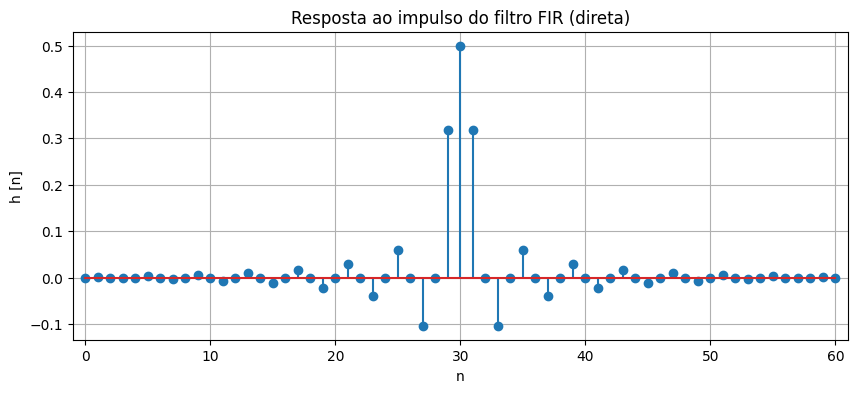

In [145]:
plt.figure(figsize=(10, 4))
plt.stem(arange(len(fir_direct)), fir_direct)
plt.title('Resposta ao impulso do filtro FIR (direta)')
plt.xlabel('n')
plt.ylabel('h [n]')
xlim = [-1, 61]
plt.xlim(xlim)
plt.grid(True)
plt.show()

Como esperado do filtro passa-baixas (tipo I) projetado, a resposta ao impulso do filtro projetado se aproxima de uma função sinc, com comprimento $M + 1$, com simetria par e centrada em $M/2$

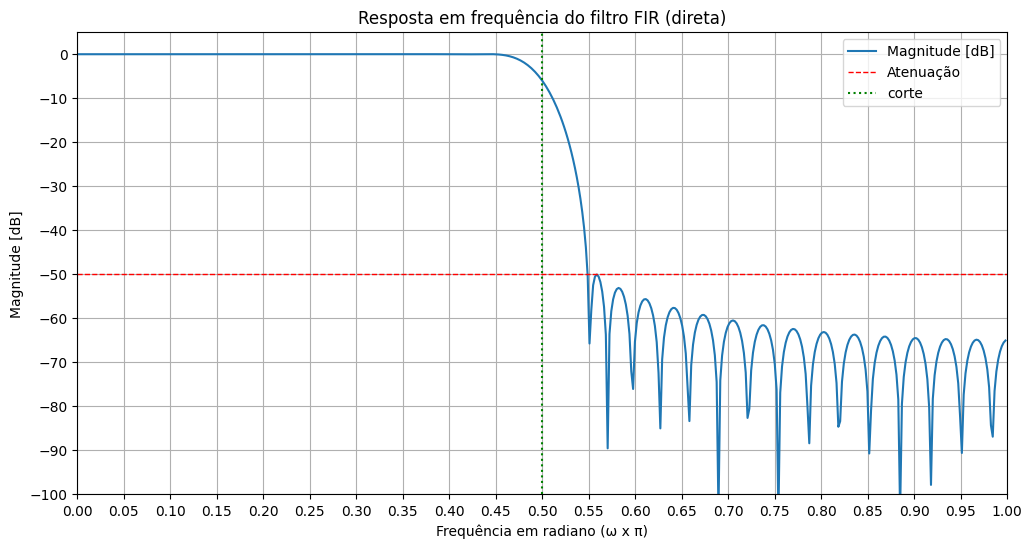

In [150]:

omega_direct, response_direct = freqz(fir_direct) # Calcula resposta do filtro na forma direta

omega_norm = omega_direct / pi                    # Normaliza a frequência para o intervalo [0, 1]
response_dB = 20 * log10(abs(response_direct))    # Muda a escala para log

plt.figure(figsize=(12, 6))
plt.plot(omega_norm, response_dB, label='Magnitude [dB]')
plt.title('Resposta em frequência do filtro FIR (direta)')
plt.xlabel('Frequência em radiano (ω x π)')
plt.ylabel('Magnitude [dB]')
xticks = arange(0, 1.05, 0.05)
plt.xticks(xticks)
yticks = arange(0, -110, -10)
plt.yticks(yticks)
ylim = [-100, 5]
plt.ylim(ylim)
xlim = [0, 1.0]
plt.xlim(xlim)
plt.axhline(-50, color='red', linestyle='--', linewidth=1, label='Atenuação')
plt.axvline(0.5, color='green', linestyle=':', linewidth=1.5, label='corte')
plt.grid(True)
plt.legend()
plt.show()

In [130]:
# Constrói o filtro usando a forma em cascata
fir_cascate = tf2sos(fir_direct, [1.0])

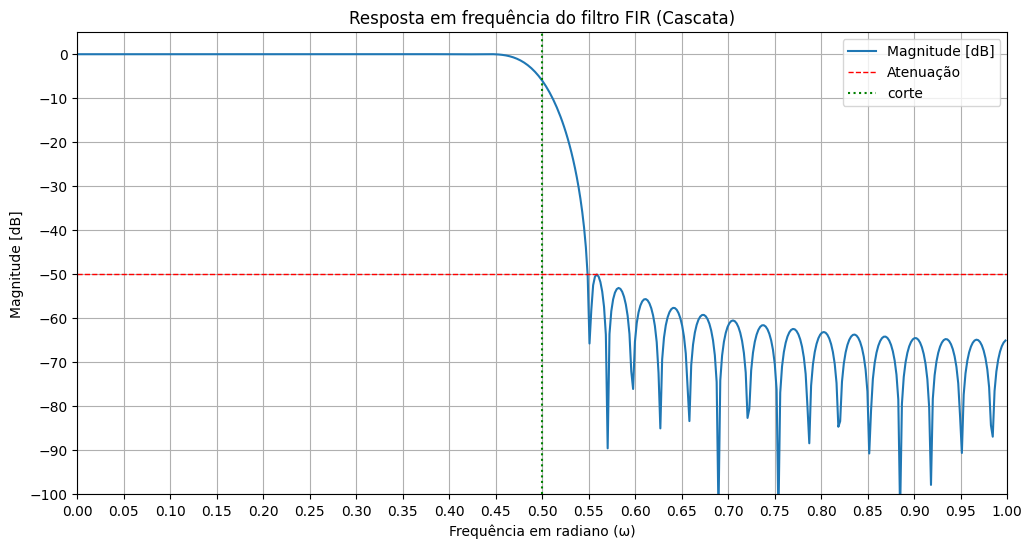

In [149]:
omega_cascate, response_cascate = sosfreqz(fir_cascate) # Calcula resposta do filtro em cascata

omega_norm = omega_cascate / pi
response_dB = 20 * log10(abs(response_cascate))

plt.figure(figsize=(12, 6))
plt.plot(omega_norm, response_dB, label='Magnitude [dB]')
plt.title('Resposta em frequência do filtro FIR (Cascata)')
plt.xlabel('Frequência em radiano (ω)')
plt.ylabel('Magnitude [dB]')
xticks = arange(0, 1.05, 0.05)
plt.xticks(xticks)
yticks = arange(0, -110, -10)
plt.yticks(yticks)
ylim = [-100, 5]
plt.ylim(ylim)
xlim = [0, 1.0]
plt.xlim(xlim)
plt.axhline(-50, color='red', linestyle='--', linewidth=1, label='Atenuação')
plt.axvline(0.50, color='green', linestyle=':', linewidth=1.5, label='corte')
plt.legend()
plt.grid(True)
plt.show()


## TODO: Fazer o gráfico do erro de aproximação.

## EXEMPLO
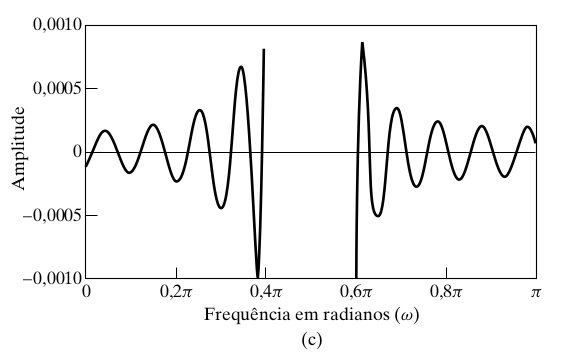

Pela análise, é possível perceber que, para um grau elevado de precisão (i.e. para um número elevado de casas decimais), a resposta em frequência dos filtros não tem uma variação significativa